#### tensorflow 및 keras 설치

In [0]:
#!pip install tensorflow

In [0]:
#!pip install keras 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf


Using TensorFlow backend.


## 디바이스 확인

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11992748364687923877, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5256766770522436277
 physical_device_desc: "device: XLA_CPU device"]

## 데이터셋 생성

In [4]:
np.random.seed(1233231)
x1 = np.random.random(5000)
x2 = np.random.random(5000)
print(x1[0 : 10])
print(x2[0 : 5])

[0.16305852 0.07648301 0.0612393  0.43600922 0.92321732 0.92540387
 0.80456686 0.50659277 0.51345946 0.39667097]
[0.81333089 0.44851228 0.85342543 0.10960804 0.82960001]


## 데이터 분포 확인

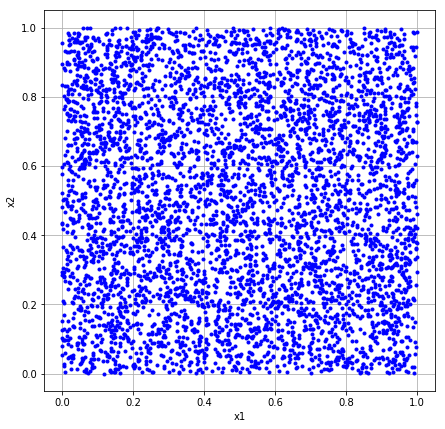

In [7]:
plt.figure(figsize=(7, 7))
plt.plot(x1, x2, 'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

## 데이터 분류

In [0]:
def classify_data(x1, x2):
    target = []
    for i in range(len(x1)):
        if x1[i] < 0.5 and x2[i] < 0.5:
            target.append('type1')
        elif x1[i] >= 0.5 and x2[i] < 0.5:
            target.append('type2')
        elif x1[i] < 0.5 and x2[i] >= 0.5:
            target.append('type3')
        elif x1[i] >= 0.5 and x2[i] >= 0.5:
            target.append('type4')
    return np.array(target)
        

In [9]:
target = classify_data(x1, x2)
print(target[0 : 10])

['type3' 'type1' 'type3' 'type1' 'type4' 'type4' 'type2' 'type2' 'type4'
 'type1']


In [11]:
print(len(target[target == 'type1']))
print(len(target[target == 'type2']))
print(len(target[target == 'type3']))
print(len(target[target == 'type4']))


1250
1252
1249
1249


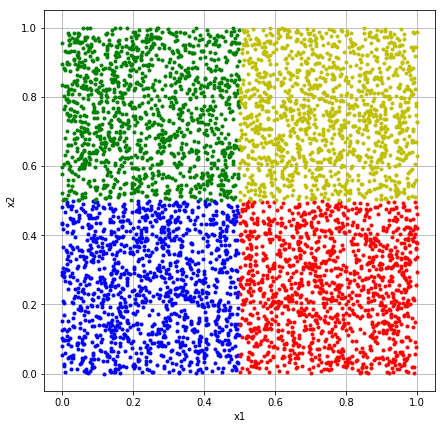

In [12]:
plt.figure(figsize=(7, 7))
plt.plot(x1[target == 'type1'], x2[target == 'type1'], 'b.')
plt.plot(x1[target == 'type2'], x2[target == 'type2'], 'r.')
plt.plot(x1[target == 'type3'], x2[target == 'type3'], 'g.')
plt.plot(x1[target == 'type4'], x2[target == 'type4'], 'y.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

## 데이터 합치기

In [0]:
def merge_data(x1, x2):
    ret = []
    for i in range(len(x1)):
        ret.append([x1[i], x2[i]])
    return np.array(ret)


In [14]:
data = merge_data(x1, x2)
data[0 : 5]

array([[0.16305852, 0.81333089],
       [0.07648301, 0.44851228],
       [0.0612393 , 0.85342543],
       [0.43600922, 0.10960804],
       [0.92321732, 0.82960001]])

In [0]:
# data2 = np.zeros((5000, 2))
# data2[:, 0] = x1
# data2[:, 1] = x2
# data2

array([[0.80572311, 0.29007362],
       [0.34060983, 0.29812645],
       [0.04417443, 0.83551417],
       ...,
       [0.80123207, 0.24970485],
       [0.64909159, 0.88748513],
       [0.41550953, 0.68573394]])

## 범주화 작업

In [15]:
encoder = LabelBinarizer()
print(target[0 : 10])
target = encoder.fit_transform(target)
print(target[0 : 10])
print(encoder.classes_)


['type3' 'type1' 'type3' 'type1' 'type4' 'type4' 'type2' 'type2' 'type4'
 'type1']
[[0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]]
['type1' 'type2' 'type3' 'type4']


## 데이터 분할

In [0]:
x_train = data[0 : 4000]
t_train = target[0 : 4000]

x_test = data[4000 : ]
t_test = target[4000 : ]

## model1 = sigmoid 모델 

In [18]:
model1 = Sequential()

model1.add(Dense(16, input_dim = 2, activation = 'sigmoid' ))
model1.add(Dense(16, activation = 'sigmoid' ))
model1.add(Dense(4, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist1 = model1.fit(x_train, t_train, epochs = 50, batch_size = 20)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
4000/4000 [==============================] - 1s 224us/step - loss: 1.3795 - acc: 0.2970
Epoch 2/50
4000/4000 [==============================] - 0s 57us/step - loss: 1.3547 - acc: 0.4870
Epoch 3/50
4000/4000 [==============================] - 0s 56us/step - loss: 1.3122 - acc: 0.5783
Epoch 4/50
4000/4000 [==============================] - 0s 56us/step - loss: 1.2316 - acc: 0.7238
Epoch 5/50
4000/4000 [==============================] - 0s 59us/step - loss: 1.0984 - acc: 0.8552
Epoch 6/50
4000/4000 [==============================] - 0s 61us/step - loss: 0.9251 - acc: 0.8690
Epoch 7/50
4000/4000 [==============================] - 0s 61us/step - loss: 0.7486 - acc: 0.9075
Epoch 8/50
4000/4000 [==============================] - 0s 58us/step - loss: 0.5971 - acc: 0.9330
Epoch 9/50
4000/4000 [==============================] - 0s 57us/step - loss: 0.4821 - acc: 0.9490
Epoch 10/50
4000/

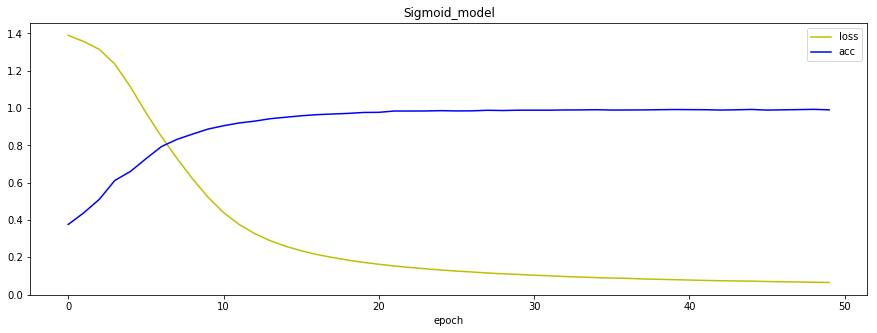

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(hist1.history['loss'], 'y', label = 'loss')
plt.plot(hist1.history['acc'], 'b', label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc = 'best')
plt.show()


## model1 평가

In [19]:
model1_loss_and_metrics = model1.evaluate(x_test, t_test, batch_size = 20)
model1_loss_and_metrics

1000/1000 [==============================] - 0s 71us/step


[0.06088559309951961, 0.9939999985694885]

## model2 = relu 모델

In [0]:
model2 = Sequential()
model2.add(Dense(16, input_dim = 2, activation = 'relu' ))
model2.add(Dense(16, activation = 'relu' ))
model2.add(Dense(4, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist2 = model2.fit(x_train, t_train, epochs = 50, batch_size = 20)

Epoch 1/50
4000/4000 [==============================] - 1s 179us/step - loss: 1.1396 - acc: 0.5708
Epoch 2/50
4000/4000 [==============================] - 0s 63us/step - loss: 0.6771 - acc: 0.8195
Epoch 3/50
4000/4000 [==============================] - 0s 65us/step - loss: 0.3697 - acc: 0.9130
Epoch 4/50
4000/4000 [==============================] - 0s 66us/step - loss: 0.2510 - acc: 0.9422
Epoch 5/50
4000/4000 [==============================] - 0s 66us/step - loss: 0.1918 - acc: 0.9565
Epoch 6/50
4000/4000 [==============================] - 0s 66us/step - loss: 0.1595 - acc: 0.9692
Epoch 7/50
4000/4000 [==============================] - 0s 67us/step - loss: 0.1387 - acc: 0.9765
Epoch 8/50
4000/4000 [==============================] - 0s 65us/step - loss: 0.1233 - acc: 0.9785
Epoch 9/50
4000/4000 [==============================] - 0s 70us/step - loss: 0.1109 - acc: 0.9832
Epoch 10/50
4000/4000 [==============================] - 0s 64us/step - loss: 0.1034 - acc: 0.9820
Epoch 11/50
4000/4

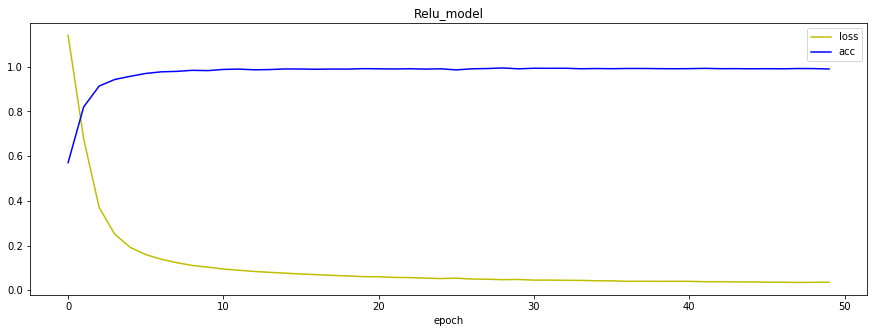

In [0]:
plt.figure(figsize = (15, 5))
plt.plot(hist2.history['loss'], 'y', label = 'loss')
plt.plot(hist2.history['acc'], 'b', label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc = 'best')
plt.show()


## model2 평가

In [0]:
model2_loss_and_metrics = model2.evaluate(x_test, t_test, batch_size = 20)
model2_loss_and_metrics

1000/1000 [==============================] - 0s 166us/step


[0.041152794341905975, 0.9839999961853028]

## 테스트 데이터 예측 확인

In [21]:
predict1 = model1.predict(x_test)
print(predict1)

[[4.1989613e-04 3.3850876e-07 9.9870765e-01 8.7211106e-04]
 [3.6307990e-09 2.3074022e-04 3.8822818e-06 9.9976534e-01]
 [2.7427581e-05 1.5874592e-07 9.9364316e-01 6.3291672e-03]
 ...
 [6.5438553e-07 6.7142289e-05 3.9473604e-03 9.9598491e-01]
 [1.0303922e-09 2.2395423e-05 1.3272811e-05 9.9996436e-01]
 [6.2281694e-03 9.2397372e-08 9.9376065e-01 1.1154130e-05]]


In [0]:
predict2 = model2.predict(x_test)
print(predict2)

[[7.70454699e-06 2.69650811e-13 9.99992251e-01 3.88799855e-08]
 [5.27953198e-05 9.99947190e-01 5.39073452e-15 1.13757734e-12]
 [3.95353156e-04 9.99604642e-01 1.82670583e-14 7.74132006e-13]
 ...
 [4.34138014e-09 2.11325423e-17 1.00000000e+00 2.74033640e-09]
 [1.42246366e-01 8.57298613e-01 1.21917015e-04 3.33054253e-04]
 [1.18946158e-10 1.00000000e+00 7.89504991e-20 8.62591465e-13]]


## 예측 확인

In [24]:
for i in range(len(t_test)):
    if np.argmax(t_test[i]) != np.argmax(predict1[i]):
        print(format(x_test[i, 0], "1.4f"), format(x_test[i, 1], "1.4f"), np.argmax(t_test[i]), np.argmax(predict1[i]))

0.9115 0.5043 3 1
0.4821 0.5041 2 0
0.3024 0.5052 2 0
0.5579 0.5018 3 1
0.4210 0.5012 2 0
0.4212 0.5008 2 0


In [0]:
for i in range(len(t_test)):
    if np.argmax(t_test[i]) != np.argmax(predict2[i]):
        print(format(x_test[i, 0], "1.4f"), format(x_test[i, 1], "1.4f"), np.argmax(t_test[i]), np.argmax(predict2[i]))

0.8180 0.5099 3 1
0.2272 0.5023 2 0
0.5044 0.3393 1 0
0.5040 0.5935 3 2
0.5097 0.9501 3 2
0.2799 0.5002 2 0
0.5167 0.5068 3 1
0.6007 0.5072 3 1
0.4999 0.0129 0 1
0.9984 0.5020 3 1
0.3277 0.5031 2 0
0.1738 0.5023 2 0
0.5018 0.6507 3 2
0.5106 0.9565 3 2
0.5050 0.2041 1 0
0.7598 0.5049 3 1
